In [2]:
# loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
# Load Dataset
df = pd.read_csv("data/text_emotion_dataset.csv")

In [8]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [9]:
# Value Counts
df['Emotion'].value_counts()

joy          11045
sadness       6722
fear          5410
anger         4297
surprise      4062
neutral       2254
disgust        913
shame          245
gratitude       58
love            51
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

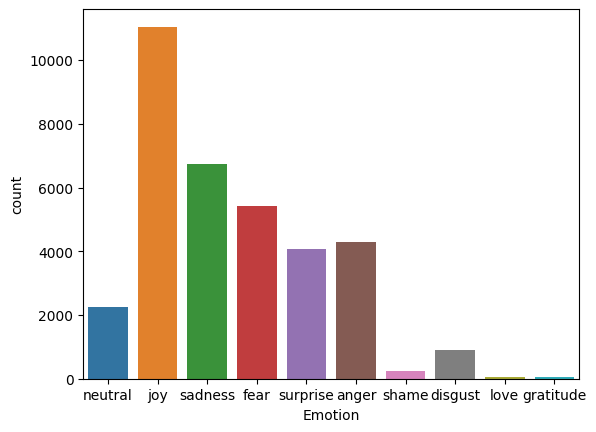

In [10]:
# Plot
sns.countplot(x='Emotion',data=df)

In [11]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [13]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
35052,shame,You should show more respect towards others!,respect others!
35053,shame,How could you be so thoughtless?,thoughtless?
35054,shame,You should be ashamed of yourself for what you...,ashamed did!
35055,shame,That was really inappropriate behavior from you!,inappropriate behavior you!


In [15]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [16]:
#  Spliting dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [20]:
from sklearn.pipeline import Pipeline
pipe_line = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [21]:
# Train and Fit Data
pipe_line.fit(x_train,y_train)

C:\Users\kotla\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
pipe_line

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [23]:
# Check Accuracy
pipe_line.score(x_test,y_test)

0.617417760030424

In [24]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [25]:
pipe_line.predict([ex1])

array(['joy'], dtype=object)

In [26]:
# Prediction Prob
pipe_line.predict_proba([ex1])

array([[1.15392428e-03, 4.06607998e-03, 1.46244044e-02, 1.79379200e-04,
        9.11547167e-01, 6.53271267e-05, 5.86360051e-05, 1.84187616e-02,
        6.99101932e-05, 4.98164106e-02]])

In [27]:
# To Know the classes
pipe_line.classes_

array(['anger', 'disgust', 'fear', 'gratitude', 'joy', 'love', 'neutral',
       'sadness', 'shame', 'surprise'], dtype=object)

In [29]:
# Save Model & Pipeline
import joblib
pipeline_file = open("pickle.pkl","wb")
joblib.dump(pipe_line,pipeline_file)
pipeline_file.close()

In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your actual dataset file)
# df = pd.read_csv('your_dataset.csv')

# Extract 'Cleaned_Text' and 'Emotion' columns
texts = df['Clean_Text'].tolist()
labels = df['Emotion'].tolist()

# Tokenize the text and convert it into sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)

# Padding sequences to have the same length
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Convert labels into one-hot encoding
label_to_index = {label: idx for idx, label in enumerate(set(labels))}
y = np.array([label_to_index[label] for label in labels])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(len(label_to_index), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.save("model.h5")
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict emotions for new text data
new_texts = ["I'm feeling really excited!", "This is a sad story."]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_sequence_length, padding='post')
predicted_labels = model.predict(new_X)
predicted_labels = [list(label_to_index.keys())[list(label_to_index.values()).index(np.argmax(label))] for label in predicted_labels]
print("Predicted Emotions:", predicted_labels)


Epoch 1/10
702/702 [==============================] - 135s 186ms/step - loss: 1.8400 - accuracy: 0.3071 - val_loss: 1.8136 - val_accuracy: 0.3099
Epoch 2/10
702/702 [==============================] - 123s 175ms/step - loss: 1.8155 - accuracy: 0.3175 - val_loss: 1.8150 - val_accuracy: 0.3099
Epoch 3/10
702/702 [==============================] - 120s 171ms/step - loss: 1.8092 - accuracy: 0.3177 - val_loss: 1.8113 - val_accuracy: 0.3099
Epoch 4/10
702/702 [==============================] - 116s 165ms/step - loss: 1.8079 - accuracy: 0.3177 - val_loss: 1.8127 - val_accuracy: 0.3099
Epoch 5/10
702/702 [==============================] - 119s 169ms/step - loss: 1.8046 - accuracy: 0.3177 - val_loss: 1.8135 - val_accuracy: 0.3099
Epoch 6/10
702/702 [==============================] - 133s 190ms/step - loss: 1.8036 - accuracy: 0.3177 - val_loss: 1.8109 - val_accuracy: 0.3099
Epoch 7/10
702/702 [==============================] - 120s 170ms/step - loss: 1.8034 - accuracy: 0.3177 - val_loss: 1.8107 -